The libraries necessary for executing this program gets installed first. 


In [1]:
!pip install aiml #aiml module is installed

     |████████████████████████████████| 2.1MB 6.9MB/s 


In [2]:
! pip install azure-cognitiveservices-language-textanalytics # Azure libraries for translating text, recognizing text sentiments is installed.

     |████████████████████████████████| 51kB 4.1MB/s 
     |████████████████████████████████| 92kB 7.0MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 


In [3]:
! pip install azure.cognitiveservices.speech # Azure libraries for speech synthesis and speech recognition is installed.

     |████████████████████████████████| 3.2MB 7.8MB/s 


In [4]:
! pip install azure-cognitiveservices-vision-computervision # Azure libraries for recognizing text from images is installed.

In [5]:
"""
MODULE CODE: ISYS30221
MODULE NAME: Artificial Intelligence 202021 Full Year
NTU ID: N0830182
NAME: Dayeeta Das

This is a program containing a chatbot named Dahlia who is the virtual assistant of an online shopping centre.
* Dahlia uses rule based and similarity based components to answer the queries of the user.
* Dahlia also is capable of identifying images.
"""

'\nMODULE CODE: ISYS30221\nMODULE NAME: Artificial Intelligence 202021 Full Year\nNTU ID: N0830182\nNAME: Dayeeta Das\n\nThis is a program containing a chatbot named Dahlia who is the virtual assistant of an online shopping centre.\n* Dahlia uses rule based and similarity based components to answer the queries of the user.\n* Dahlia also is capable of identifying images.\n'

In [7]:
from google.colab import drive # The drive gets mounted for accessing the different files necessary for the smooth execution of the code.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:

cog_key = 'f329db7d6e754fa68c84e518299f2f56'                    # The live Azure keys, endpoint and location is set 
cog_endpoint = 'https://dayeeta-das.cognitiveservices.azure.com/' # for the Azure resources used in the program.
cog_region = 'uksouth'
print('Ready to use cognitive services at {} using key {}'.format(cog_endpoint, cog_key))

Ready to use cognitive services at https://dayeeta-das.cognitiveservices.azure.com/ using key f329db7d6e754fa68c84e518299f2f56


In [9]:
#necessary modules are imported for the functioning of the program
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import aiml
import os
import nltk
import numpy as np
import random
import string # to process standard python strings
import matplotlib.pyplot as plt
from nltk.corpus import stopwords   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity                      
from random import choice
from shutil import copy2
import csv
from __future__ import absolute_import, division, print_function, unicode_literals    
kernel = aiml.Kernel()
from nltk.sem import Expression
from nltk.inference import ResolutionProver
read_expr = Expression.fromstring
import pandas
from google.colab import files
from IPython import display
from IPython.display import Image
import glob
import requests, uuid, json
from azure.cognitiveservices.language.textanalytics import TextAnalyticsClient
from msrest.authentication import CognitiveServicesCredentials
text_analytics_client = TextAnalyticsClient(endpoint=cog_endpoint,
                                            credentials=CognitiveServicesCredentials(cog_key))
from azure.cognitiveservices.speech import SpeechConfig, SpeechRecognizer, AudioConfig
import IPython
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from msrest.authentication import CognitiveServicesCredentials
from PIL import Image
import time

In [10]:
nltk.download('stopwords') # the different nltk resources used for processing the text is downloaded.
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [11]:
rules = ["HELLO", "WHO ARE YOU", "I WANT TO PURCHASE FLOWERS","WHAT IS A MARIGOLD", "DO YOU KNOW WHAT IS A MARIGOLD", "WHAT'S A MARIGOLD","WHAT IS A LILY","CAN U TELL ME MORE ABOUT LILY","WHAT'S A LILY","I WANT ROSES","I WANT RED ROSES","I WANT PINK ROSES","I WANT WHITE ROSES","20 ROSES","30 ROSES","40 ROSES","I WANT LILIES","YELLOW LILIES","WHITE LILIES","PINK LILIES","20 LILIES","30 LILIES","40 LILIES","I WANT MARIGOLDS","I WANT ORANGE MARIGOLDS","I WANT YELLOW MARIGOLDS","20 MARIGOLDS","30 MARIGOLDS","40 MARIGOLDS","I WOULD LIKE TO CHECKOUT","I WOULD LIKE TO GET SOME VASES","I WANT CLASSIC VASES","I WANT CUBE VASES","I WANT BUD VASES","1","2","3","4","5","HELP","QUIT"]
predict = "CAN YOU PLEASE TELL ME IF U HAVE THE PRODUCT THAT I AM LOOKING FOR"
predict_multiple = "CAN YOU PLEASE IDENTIFY THESE PRODUCTS FOR ME"
rules_logic = ["I KNOW THAT ROSE IS HERB", "I KNOW THAT MARIGOLD IS SHRUB", "I KNOW THAT LILY IS SHRUB", "I KNOW THAT ROSE IS ORANGE", "I KNOW THAT MARIGOLD IS RED", "I KNOW THAT LILY IS RED"]
subjects = ["SHRUB", "HERB", "RED", "WHITE", "ORANGE", "FLOWER"]
codes = ["fr", "it", "bn", "hi", "as", "el", "ja", "or", "pa", "ar"]
review = "I WANT TO WRITE A REVIEW"

In [12]:
# creating a sequential model
cnn = tf.keras.models.Sequential()

# adding convolution layer to network
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224, 3]))

# adding pooling layer to network
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [13]:
# adding a flatten layer to CNN
cnn.add(tf.keras.layers.Flatten())

# adding fully connected layers
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dense(224, activation='relu'))

# output layer -> 11 Neurons for 11 different classes
# activation function used for multiclass classification is softmax, for binary use sigmoid as activation fxn
cnn.add(tf.keras.layers.Dense(11, activation='softmax'))

In [14]:
# loading training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

# loading testing data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 66 images belonging to 11 classes.
Found 33 images belonging to 11 classes.


In [15]:
# the layers are added to the model
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[224, 224, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(11, activation='softmax'))

In [16]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]) #the optimizer and the loss function is set
cnn.fit(x=train_generator, validation_data=test_generator, epochs=30)

Epoch 1/30
3/3 [==============================] - 31s 7s/step - loss: 2.7229 - accuracy: 0.1001 - val_loss: 2.4279 - val_accuracy: 0.0909
Epoch 2/30
3/3 [==============================] - 7s 2s/step - loss: 2.4610 - accuracy: 0.0831 - val_loss: 2.3539 - val_accuracy: 0.0909
Epoch 3/30
3/3 [==============================] - 7s 3s/step - loss: 2.2652 - accuracy: 0.2001 - val_loss: 2.2412 - val_accuracy: 0.1515
Epoch 4/30
3/3 [==============================] - 7s 2s/step - loss: 2.2104 - accuracy: 0.1688 - val_loss: 2.0451 - val_accuracy: 0.2727
Epoch 5/30
3/3 [==============================] - 7s 2s/step - loss: 1.9810 - accuracy: 0.2271 - val_loss: 1.8626 - val_accuracy: 0.2727
Epoch 6/30
3/3 [==============================] - 7s 3s/step - loss: 1.5840 - accuracy: 0.3347 - val_loss: 1.5727 - val_accuracy: 0.4242
Epoch 7/30
3/3 [==============================] - 7s 2s/step - loss: 1.6662 - accuracy: 0.3335 - val_loss: 1.5018 - val_accuracy: 0.5152
Epoch 8/30
3/3 [========================

In [17]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 48)      1344      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 48)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 48)      20784     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 32)        13856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)            

In [18]:
# The final loss and final accuracy is calculated and the model is saved in the H5 format
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(test_generator.samples/test_generator.batch_size)
final_loss, final_accuracy = cnn.evaluate(test_generator, 
steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))
cnn.save("/content/drive/My Drive/flowerBot/model.h5")
print("saved model to disk")

2/2 [==============================] - 1s 26ms/step - loss: 0.5001 - accuracy: 0.7576
Final loss: 0.50
Final accuracy: 75.76%
saved model to disk


In [19]:
# the save model is loaded
loaded_model = load_model('/content/drive/My Drive/flowerBot/model.h5')
#loaded_model = tf.keras.models.load_model('Dahlia.h5')
loaded_model.layers[0].input_shape #(None, 160, 160, 3)

(None, 224, 224, 3)

In [20]:
# the file for learning the aiml rules is loaded
kernel.learn("/content/drive/My Drive/flowerBot/Dahlia.aiml")

Loading /content/drive/My Drive/flowerBot/Dahlia.aiml...done (0.01 seconds)


In [21]:
# the file for implementing the similarity based component is loaded 
f=open('/content/drive/My Drive/flowerBot/flowerQA.csv','r',errors = 'ignore')### opens the file for similarity based system
raw=f.read()
raw=raw.lower()# converts to lowercase
sent_tokens = nltk.sent_tokenize(raw)# converts to list of sentences 
word_tokens = nltk.word_tokenize(raw)# converts to list of tokens
lemmer = nltk.stem.WordNetLemmatizer()

In [22]:
user_response = " "
# WordNet is a semantically-oriented dictionary of English included in NLTK.
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [23]:
stop_words = nltk.corpus.stopwords.words('english')
new_stopwords = ['ha', 'le', 'u', 'wa'] 
new = stop_words.extend(new_stopwords)### customizing and adding more stopwords to the list

In [24]:
kb=[]
data = pandas.read_csv('/content/drive/My Drive/flowerBot/test2.csv', header=None) # The file for the pattern based Q/A's is loaded.
[kb.append(read_expr(row)) for row in data[0]]

[None, None, None, None, None, None, None, None, None, None]

In [25]:
def response(user_response): ### function for matching an answer to the user's questions
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words= new)
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you"
        return robo_response
    else:
        robo_response = sent_tokens[idx]
        return robo_response

In [26]:
# This function predicts a single image uploaded by the user
def predict_product():
  uploaded = files.upload()
  filename = next(iter(uploaded))
  global nimg
  nimg = image.load_img(filename, target_size = (224, 224))
  img = image.load_img(filename, target_size = (224, 224))
  img = np.expand_dims(img, axis=0)
  predictions = loaded_model.predict(img)
  index = np.argmax(predictions[0])
  product_type = ""
  if index == 0:
        product_type = "This is a Bud Vase"
  elif index == 1:
        product_type = "This is a Classic Vase"
  elif index == 2:
        product_type = "This is a Cube Vase"
  elif index == 3:
        product_type = "This is a Orange Marigold"
  elif index == 4:
        product_type = "This is a Pink Lily"
  elif index == 5:
        product_type = "This is a Pink Rose"
  elif index == 6:
        product_type = "This is a Red Rose"
  elif index == 7:
        product_type = "This is a White Lily"
  elif index == 8:
        product_type = "This is a White Rose"
  elif index == 9:
        product_type = "This is a Yellow Lily"
  elif index == 10:
        product_type = "This is a Yellow Marigold"
  print(product_type)


In [27]:
# This function is used for predicting multiple images uploaded by the user.
def pred():
  uploaded = files.upload()
  keys = uploaded.keys()
  for key in keys:
      ximg = image.load_img(key)
      img = image.load_img(key, target_size = (224, 224))
      img = np.expand_dims(img, axis=0)
      predictions = loaded_model.predict(img)
      index = np.argmax(predictions[0])
      product_type = ""
      if index == 0:
        product_type = "This is a Bud Vase"
      elif index == 1:
            product_type = "This is a Classic Vase"
      elif index == 2:
            product_type = "This is a Cube Vase"
      elif index == 3:
            product_type = "This is a Orange Marigold"
      elif index == 4:
            product_type = "This is a Pink Lily"
      elif index == 5:
            product_type = "This is a Pink Rose"
      elif index == 6:
            product_type = "This is a Red Rose"
      elif index == 7:
            product_type = "This is a White Lily"
      elif index == 8:
            product_type = "This is a White Rose"
      elif index == 9:
            product_type = "This is a Yellow Lily"
      elif index == 10:
            product_type = "This is a Yellow Marigold"
      plt.imshow(ximg)
      plt.show()
      print(product_type)
      index += 1

In [28]:
#This function is used for translating the chat from the input language to english and then the answer matched is translated back to the input language.
def translate_text(cog_region, cog_key, text, to_lang='fr', from_lang='en'):
    import requests, uuid, json

    # Create the URL for the Text Translator service REST request
    path = 'https://api.cognitive.microsofttranslator.com/translate?api-version=3.0'
    params = '&from={}&to={}'.format(from_lang, to_lang)
    constructed_url = path + params

    # Prepare the request headers with Cognitive Services resource key and region
    headers = {
        'Ocp-Apim-Subscription-Key': cog_key,
        'Ocp-Apim-Subscription-Region':cog_region,
        'Content-type': 'application/json',
        'X-ClientTraceId': str(uuid.uuid4())
    }

    # Add the text to be translated to the body
    body = [{
        'text': text
    }]

    # Get the translation
    request = requests.post(constructed_url, headers=headers, json=body)
    response = request.json()
    return response[0]["translations"][0]["text"]

Welcome to Bloom: the ultimate site to purchase the best quality flowers and vases
My name is Dahlia and I am going to be your virtual assistant today.
Type in 'HELP' for more information and 'EXIT' to quit.
Alright then let's get started. Ask me any questions
User: qui es-tu
Dahlia: Je suis Dahlia
User: তুমি কে
Dahlia: এটা এখানে ডালিয়া
User: सभी फूल ताजे हैं
Dahlia: सभी फूल हमारे वितरण घरों के पास बगीचे से ताजा लाया जाता है ।
User: CAN YOU PLEASE IDENTIFY THIS VOICE RECORDING FOR ME


Saving What is a lily.wav to What is a lily (3).wav


Dahlia: Lilium is a genus of herbaceous flowering plants growing from bulbs, all with large prominent flowers.
User: CAN YOU PL Z IDENTIFY THIS HANDWRITTEN QUERY FOR ME


Saving what-is-a-lily.jpg to what-is-a-lily.jpg
WHAT IS A LILY
Dahlia: Lilium is a genus of herbaceous flowering plants growing from bulbs, all with large prominent flowers.
User: I WANT TO WRITE A REVIEW
Dahlia: Sure. Please type in your review ...
Review: This site was very useful.
1 : This is a positive comment. (0.9552197456359863)
User: I WANT TO WRITE A REVIEW
Dahlia: Sure. Please type in your review ...
Review: The flowers were not good and were pale.
1 : This is a negative comment. (0.09794199466705322)
User: CAN YOU PLEASE IDENTIFY THESE PRODUCTS FOR ME
Dahlia: Let me check ...


Saving 4.jpg to 4 (1).jpg
Saving 3.jpg to 3 (1).jpg
Saving 2.jpg to 2 (1).jpg


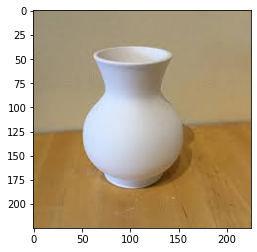

This is a White Lily


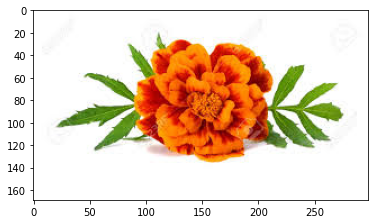

This is a Orange Marigold


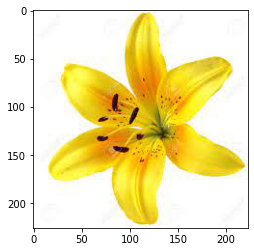

This is a Yellow Lily
User: I KNOW THAT ROSE IS HERB
Dahlia: This is not right according to my knowledge.
User: I WANT ROSES
Dahlia: Great! Which color - Red, Pink or White?
User: can i pay using credit card
Dahlia: you can pay by your credit or debit card
User: EXIT.
Dahlia: I am sorry! I don't understand you
User: EXIT
Dahlia: Sad to see you go


In [32]:
# Main loop for executing the program
print("Welcome to Bloom: the ultimate site to purchase the best quality flowers and vases")
print("My name is Dahlia and I am going to be your virtual assistant today.")
print("Type in 'HELP' for more information and 'EXIT' to quit.")
print("Alright then let's get started. Ask me any questions")
while True:
    user_response = input('User: ')
    text = user_response
    lists = []
    question = {"id":1, "text":text} # stores the text input by the user to a dictionary
    lists.append(question) # appends this text input to a list.
    language_analysis = text_analytics_client.detect_language(documents=lists) # detects the language of the input text
    for i in range(len(lists)):
      lang = language_analysis.documents[i].detected_languages[0]
    lan = lang.name
    code = lang.iso6391_name # stores the language code of the input text
    responseAgent = 'aiml'
    store = kernel.respond(user_response)
    if store[0] == '#':
       params = store[1:].split('$')
       cmd = int(params[0])
    if user_response == 'EXIT':
        print('Dahlia: Sad to see you go')
        break
    elif user_response == "CAN YOU PLEASE IDENTIFY THIS VOICE RECORDING FOR ME": # checks the voice file uploaded, matches to an answer and prints the response.
        uploaded = files.upload()
        file_name = next(iter(uploaded))
        speech_config = SpeechConfig(cog_key, cog_region)
        audio_config = AudioConfig(filename=file_name) 
        speech_recognizer = SpeechRecognizer(speech_config, audio_config)
        speech = speech_recognizer.recognize_once()
        IPython.display.display(IPython.display.Audio(file_name, autoplay=True),
                                  IPython.display.HTML(speech.text))
        text = speech.text
        txt = text.upper()
        user_response = txt[:-1]
        if user_response in rules:
          robo_response = kernel.respond(user_response)
          print('Dahlia: ' + robo_response)
        else:
          robo_response = response(user_response)
          sent_tokens.remove(user_response)
          print('Dahlia: ' + robo_response)
    elif user_response == 'CAN YOU PL Z IDENTIFY THIS HANDWRITTEN QUERY FOR ME':# detects a handwritten query, matches to a response and prints it.
      global x
      computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))
      uploaded = files.upload()
      file_name = next(iter(uploaded))
      image_stream = open(file_name, "rb")
      read_operation = computervision_client.read_in_stream(image_stream,
                                                            raw=True)
      operation_location = read_operation.headers["Operation-Location"]
      operation_id = operation_location.split("/")[-1]
      while True:
          read_results = computervision_client.get_read_result(operation_id)
          if read_results.status not in [OperationStatusCodes.running]:
              break
          time.sleep(1)
      if read_results.status == OperationStatusCodes.succeeded:
          for result in read_results.analyze_result.read_results:
              for line in result.lines:
                  x = line.text
      if '?' in x:
        x = x.replace('?', '')
      x = x.upper()
      print(x)
      user_response = x
      if user_response in rules:
          robo_response = kernel.respond(user_response)
          print('Dahlia: ' + robo_response)
      else:
          robo_response = response(user_response)
          sent_tokens.remove(user_response)
          print('Dahlia: ' + robo_response)
    elif code in codes:# checks if the user input is in a different language other than English, matches and answer and prints the response in the user's language.
      text_to_translate = text
      translation = translate_text(cog_region, cog_key, text_to_translate, to_lang='en', from_lang=code)
      user_response = translation.upper()
      if user_response in rules:
        robo_response = kernel.respond(user_response)
        update = translate_text(cog_region, cog_key, robo_response, to_lang=code, from_lang='en')
        print('Dahlia: ' + update)
      else:
        robo_response = response(user_response)
        sent_tokens.remove(user_response)
        update = translate_text(cog_region, cog_key, robo_response, to_lang=code, from_lang='en')
        print('Dahlia: ' + update)
    elif user_response == predict:# predicts a single image
        robo_response = kernel.respond(user_response)
        print('Dahlia: ' + robo_response)
        predict_product()
        plt.imshow(nimg)
        plt.show()
    elif user_response == predict_multiple:# predicts multiple images
        robo_response = kernel.respond(user_response)
        print('Dahlia: ' + robo_response)
        pred()
    elif user_response == review:# checks the sentiment of the review written by the user and prints it.
      robo_response = kernel.respond(user_response)
      print('Dahlia: ' + robo_response)
      rev = input('Review: ')
      revs = []
      r = {"id": 1, "text": rev}
      revs.append(r)
      sentiment_analysis = text_analytics_client.sentiment(documents=revs)
      for i in range(len(revs)):
          sentiment_score = sentiment_analysis.documents[i].score
          if sentiment_score < 0.5:
              sentiment = 'This is a negative comment.'
          else:
              sentiment = 'This is a positive comment.'
          print('{} : {} ({})'.format(revs[i]['id'], sentiment, sentiment_score))
      revs.pop()
    elif user_response in rules: # checks if the user's query matches with the rule-based .aiml file.
        robo_response = kernel.respond(user_response)
        print('Dahlia: ' + robo_response)
    elif cmd == 31: # if input pattern is "I know that * is *" # checks if the user has entered text in a pattern and memorizes that pattern.
         object,subject=params[1].split(' is ')
         expr=read_expr(subject + '(' + object + ')')
         obj = object
         if ((user_response not in rules_logic) and (subject in subjects)):
             kb.append(expr)
             print("Dahlia: OK, I will remember that",object,"is", subject)
         elif (user_response in rules_logic or subject not in subjects):
             print("Dahlia: This is not right according to my knowledge.")
         else:
             print ("Dahlia: I don't know about that.")
    elif cmd == 32: # if the input pattern is "check that * is *"
         object,subject=params[1].split(' is ')
         expr = read_expr(subject + '(' + object + ')')
         store = ResolutionProver().prove(expr, kb, verbose=False)
         if store:
            print('Dahlia: Correct.')
         else:
            print('Dahlia: Incorrect.')
    else: # checks if the user's query matches with any statements in the .csv file.
        print('Dahlia: ' + (response(user_response)))
        sent_tokens.remove(user_response)